In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_excel("~/Desktop/Food_Analysis/Data_Train.xlsx")
test=pd.read_excel("~/Desktop/Food_Analysis/Data_Test.xlsx")

In [16]:
data.head(5)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [17]:
data.describe()

,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
count,1.474430e+05,147443.000000,147443.000000,147443.000000,147443.000000,147408.000000,108375.000000,147443.000000
mean,2.997142e+13,17726.613003,14020.779583,13377.891009,8684.119653,81873.642156,24.129153,3.680405
std,1.154808e+13,10865.050018,7794.382869,7408.148606,5255.991577,140.248846,12.657456,1.481441
min,1.000014e+13,0.000000,0.000000,0.000000,0.000000,31259.000000,1.000000,0.000000
25%,1.994861e+13,8588.000000,7347.000000,6993.000000,4109.000000,81859.000000,14.000000,4.000000
50%,2.999146e+13,17056.000000,14256.000000,13710.000000,8541.000000,81870.000000,31.000000,4.000000
75%,3.995723e+13,26163.000000,20841.000000,19795.000000,13321.000000,81888.000000,33.000000,4.000000
max,4.999987e+13,37394.000000,27276.000000,26032.000000,17891.000000,82072.000000,70.000000,6.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147443 non-null  int64  
 1   Date                147443 non-null  object 
 2   LicenseNo           147443 non-null  int64  
 3   FacilityID          147443 non-null  int64  
 4   FacilityName        147443 non-null  int64  
 5   Type                143958 non-null  object 
 6   Street              147443 non-null  int64  
 7   City                147443 non-null  object 
 8   State               147443 non-null  object 
 9   LocationID          147408 non-null  float64
 10  Reason              147443 non-null  object 
 11  SectionViolations   108375 non-null  float64
 12  RiskLevel           147443 non-null  object 
 13  Geo_Loc             147443 non-null  object 
 14  Inspection_Results  147443 non-null  int64  
dtypes: float64(2), int64(6), object(7)

In [19]:
corr_matrix=data.corr()
corr_matrix['Inspection_Results']

ID                   -0.006987
LicenseNo            -0.042021
FacilityID           -0.004908
FacilityName         -0.004162
Street               -0.004127
LocationID           -0.001862
SectionViolations     0.250834
Inspection_Results    1.000000
Name: Inspection_Results, dtype: float64

In [20]:
data['Type'].value_counts()

RESTAURANT                      98346
GROCERY STORE                   18811
SCHOOL                           9140
CHILDREN'S SERVICES FACILITY     2320
BAKERY                           2212
                                ...  
TAVERN-LIQUOR                       1
DAY CARE COMBO (1586)               1
CLOTHING STORE                      1
DRUG STORE/W/ FOOD                  1
ALTERNATIVE SCHOOL                  1
Name: Type, Length: 409, dtype: int64

In [24]:
data['year']=data['Date'].apply(lambda x:x.split('-')[2])
data['month']=data['Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Date'].apply(lambda x:x.split('-')[0].split('T')[0])
data.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,year,month,day
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4,2010,04,26
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4,2009,06,21
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6,2013,05,01
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4,2015,09,28
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4,2015,12,09


Text(0.5, 0, '')

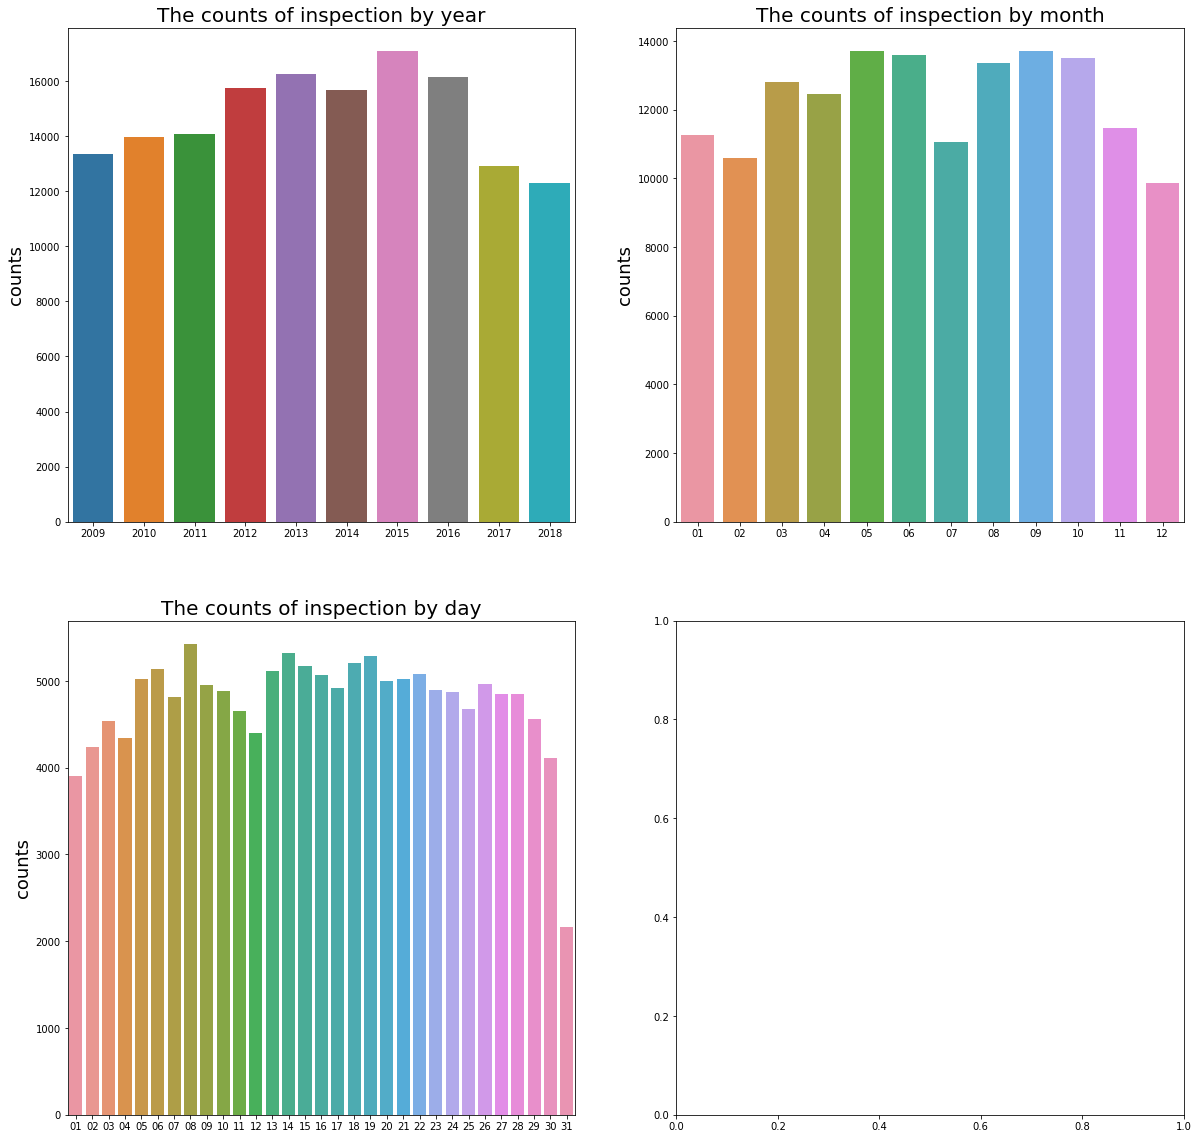

In [76]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
x=data.year.value_counts().index
y=data.year.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The counts of inspection by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')

x=data.month.value_counts().index
y=data.month.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The counts of inspection by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

x=data.day.value_counts().index
y=data.day.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The counts of inspection by day",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')

#data.groupby(['year','month'])['ID'].agg('count').unstack('year').plot(ax=ax[1,1])
#ax[1,1].set_title("The counts of inspection for every month by year",size=20)
#ax[1,1].set_ylabel('counts',size=18)
#ax[1,1].set_xlabel('month')

In [45]:
x=data.groupby(['year','RiskLevel','Type'])['Type'].count()

In [47]:
x.head(100)

year  RiskLevel  Type                              
2009  High       1023                                  1
                 1023 CHILDERN'S SERVICE S FACILITY    2
                 1023 CHILDERN'S SERVICES FACILITY     2
                 1023-CHILDREN'S SERVICES FACILITY     2
                 1584-DAY CARE ABOVE 2 YEARS           1
                                                      ..
      Low        CONVENIENCE/DRUG STORE                1
                 CONVNIENCE STORE                      1
                 DAYCARE (2 - 6 YEARS)                 3
                 DOLLAR STORE                          1
                 DRUG STORE/W/ FOOD                    1
Name: Type, Length: 100, dtype: int64

In [75]:
data_risk1=data[data.RiskLevel=='High']
p=data_risk1['Type'].value_counts()[:10]
p
#p.shape

RESTAURANT                         78947
SCHOOL                              8206
GROCERY STORE                       5780
CHILDREN'S SERVICES FACILITY        2309
DAYCARE (2 - 6 YEARS)               1987
DAYCARE ABOVE AND UNDER 2 YEARS     1796
LONG TERM CARE                       989
CATERING                             867
BAKERY                               852
DAYCARE COMBO 1586                   547
Name: Type, dtype: int64

In [73]:
data_risk2=data[data.RiskLevel=='Low']
q=data_risk2['Type'].value_counts()[:10]
q

GROCERY STORE                    6681
RESTAURANT                        993
LIQUOR                            598
MOBILE FOOD DISPENSER             562
TAVERN                            224
SCHOOL                            199
WHOLESALE                         196
GAS STATION                        86
MOBILE PREPARED FOOD VENDOR        78
MOBILE FROZEN DESSERTS VENDOR      50
Name: Type, dtype: int64

In [74]:
data_risk1=data[data.RiskLevel=='Medium']
r=data_risk1['Type'].value_counts()[:10]
r

RESTAURANT               18402
GROCERY STORE             6348
BAKERY                    1343
SCHOOL                     735
MOBILE FOOD PREPARER       437
WHOLESALE                  132
SPECIAL EVENT               79
KIOSK                       70
MOBILE FOOD DISPENSER       67
LIVE POULTRY                58
Name: Type, dtype: int64

In [93]:
data.groupby(['Reason','Type','RiskLevel'])['Type'].count()[:100]

Reason   Type                                RiskLevel
CANVASS  (CONVENIENCE STORE)                 Low           1
         1023                                High          4
         1023 CHILDERN'S SERVICE FACILITY    High          2
         1023 CHILDERN'S SERVICE S FACILITY  High          3
         1023 CHILDERN'S SERVICES FACILITY   High         13
                                                          ..
         CONVENIENCE STORE                   Low          12
                                             Medium       11
         CONVENIENCE/DRUG STORE              Low           1
         COOKING SCHOOL                      High         13
         CULINARY ARTS SCHOOL                High          5
Name: Type, Length: 100, dtype: int64

In [117]:
data.isna().sum(axis=0)

ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
year                      0
month                     0
day                       0
dtype: int64

### Type, LocationID, SectionViolations contains NAN values